In [1]:
!pip install transformers datasets peft accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [12]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import tensorflow
import numpy
import transformers
import datasets
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

print(tensorflow.__version__)
print(numpy.__version__)
print(transformers.__version__)
print(datasets.__version__)

2.18.0
1.26.4
4.52.2
2.14.4


In [ ]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [2]:
import pandas as pd
train_df = pd.read_csv("ratings_train.txt", sep='\t')
test_df = pd.read_csv("ratings_test.txt", sep='\t')

train_df.dropna(subset=['document'], inplace=True)
test_df.dropna(subset=['document'], inplace=True)

train_df.rename(columns={'label': 'labels'}, inplace=True)
test_df.rename(columns={'label': 'labels'}, inplace=True)

print(len(train_df),len(test_df))

149995 49997


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
for name, module in model.named_modules():
    if "attention" in name and isinstance(module, torch.nn.Linear):
        print(name, module)

bert.encoder.layer.0.attention.self.query Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.self.key Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.self.value Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.output.dense Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.query Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.key Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.value Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.output.dense Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.2.attention.self.query Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.2.attention.self.key Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.2.attention.self.value Linear(in_

In [12]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        print(name, module)

bert.encoder.layer.0.attention.self.query Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.self.key Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.self.value Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.attention.output.dense Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.0.intermediate.dense Linear(in_features=768, out_features=3072, bias=True)
bert.encoder.layer.0.output.dense Linear(in_features=3072, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.query Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.key Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.self.value Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.attention.output.dense Linear(in_features=768, out_features=768, bias=True)
bert.encoder.layer.1.intermediate.dense Linear(in_features

In [5]:
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],  # BERT에서는 일반적으로 q, v만 적용
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

model = get_peft_model(model, lora_config)

model.print_trainable_parameters()

trainable params: 296,450 || all params: 110,915,332 || trainable%: 0.2673


In [14]:
model.print_trainable_parameters()

trainable params: 296,450 || all params: 110,915,332 || trainable%: 0.2673


In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

base_model.model.bert.encoder.layer.0.attention.self.query.lora_A.default.weight
base_model.model.bert.encoder.layer.0.attention.self.query.lora_B.default.weight
base_model.model.bert.encoder.layer.0.attention.self.value.lora_A.default.weight
base_model.model.bert.encoder.layer.0.attention.self.value.lora_B.default.weight
base_model.model.bert.encoder.layer.1.attention.self.query.lora_A.default.weight
base_model.model.bert.encoder.layer.1.attention.self.query.lora_B.default.weight
base_model.model.bert.encoder.layer.1.attention.self.value.lora_A.default.weight
base_model.model.bert.encoder.layer.1.attention.self.value.lora_B.default.weight
base_model.model.bert.encoder.layer.2.attention.self.query.lora_A.default.weight
base_model.model.bert.encoder.layer.2.attention.self.query.lora_B.default.weight
base_model.model.bert.encoder.layer.2.attention.self.value.lora_A.default.weight
base_model.model.bert.encoder.layer.2.attention.self.value.lora_B.default.weight
base_model.model.bert.encode

  0%|          | 0/149995 [00:00<?, ?it/s]

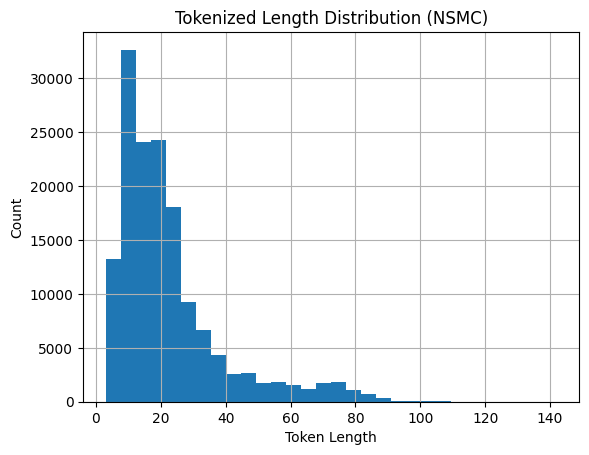

Max length: 142
95th percentile: 62.0
Mean length: 22.276189206306878
Median length: 17.0


In [38]:
texts = train_df["document"].tolist()

lengths = []

for text in tqdm(texts):
    tokens = tokenizer(
        text,
        truncation=False,
    )
    lengths.append(len(tokens["input_ids"]))

plt.hist(lengths, bins=30)
plt.title("Tokenized Length Distribution (NSMC)")
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print("Max length:", max(lengths))
print("95th percentile:", np.percentile(lengths, 95))
print("Mean length:", np.mean(lengths))
print("Median length:", np.median(lengths))

  0%|          | 0/49997 [00:00<?, ?it/s]

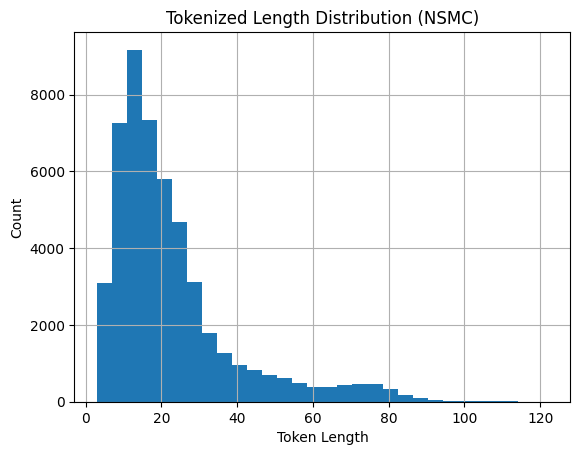

Max length: 122
95th percentile: 62.0
Mean length: 22.360981658899533
Median length: 17.0


In [39]:
texts = test_df["document"].tolist()

lengths = []

for text in tqdm(texts):
    tokens = tokenizer(
        text,
        truncation=False,
    )
    lengths.append(len(tokens["input_ids"]))

plt.hist(lengths, bins=30)
plt.title("Tokenized Length Distribution (NSMC)")
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print("Max length:", max(lengths))
print("95th percentile:", np.percentile(lengths, 95))
print("Mean length:", np.mean(lengths))
print("Median length:", np.median(lengths))

In [40]:
train_dataset = datasets.Dataset.from_pandas(train_df)

In [41]:
train_dataset

Dataset({
    features: ['id', 'document', 'label', '__index_level_0__'],
    num_rows: 149995
})

In [4]:
train_dataset = datasets.Dataset.from_pandas(train_df)
valid_dataset = datasets.Dataset.from_pandas(test_df)

def tokenize_function(example):
    return tokenizer(
        example["document"],
        padding="max_length",    # 또는 True로 하면 동적 padding
        truncation=True,
        max_length=192,
        return_token_type_ids=True,
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
valid_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/149995 [00:00<?, ? examples/s]

Map:   0%|          | 0/49997 [00:00<?, ? examples/s]

In [7]:
from transformers import TrainingArguments, Trainer
from transformers.utils import logging

#logging.set_verbosity_info()

training_args = TrainingArguments(
    output_dir="/content/results",
    learning_rate=3e-4,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    gradient_accumulation_steps=1,
    weight_decay=0.01,

    eval_strategy="steps",
    eval_steps=250,
    save_strategy="steps",
    save_steps=250,
    save_total_limit=1,

    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    greater_is_better=True,

    num_train_epochs=8,
    logging_strategy="steps",
    logging_steps=100,
    bf16=True,  # 자동으로 accelerate로 mixed precision 사용
    optim="adamw_torch_fused",
    report_to="none",
    seed = 42,
    warmup_steps = 500,
    lr_scheduler_type="cosine"
)

In [6]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = np.argmax(predictions, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

In [9]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
)

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [10]:
trainer.train()

The following columns in the Training set don't have a corresponding argument in `PeftModelForSequenceClassification.forward` and have been ignored: document, __index_level_0__, id. If document, __index_level_0__, id are not expected by `PeftModelForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 149,995
  Num Epochs = 10
  Instantaneous batch size per device = 256
  Total train batch size (w. parallel, distributed & accumulation) = 256
  Gradient Accumulation steps = 1
  Total optimization steps = 5,860
  Number of trainable parameters = 296,450


Step,Training Loss,Validation Loss,Accuracy
250,0.426600,0.348252,0.850931
500,0.326400,0.310563,0.865172
750,0.304000,0.291821,0.876893
1000,0.286800,0.283503,0.880933
1250,0.274500,0.273957,0.883973
1500,0.266700,0.270697,0.886033
1750,0.270700,0.263512,0.888973
2000,0.251100,0.260027,0.890353
2250,0.251000,0.259339,0.889913
2500,0.248600,0.258467,0.892554


The following columns in the Evaluation set don't have a corresponding argument in `PeftModelForSequenceClassification.forward` and have been ignored: document, __index_level_0__, id. If document, __index_level_0__, id are not expected by `PeftModelForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 49997
  Batch size = 256
Saving model checkpoint to /content/results/checkpoint-250
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--klue--bert-base/snapshots/77c8b3d707df785034b4e50f2da5d37be5f0f546/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attenti

TrainOutput(global_step=5860, training_loss=0.2597612566508531, metrics={'train_runtime': 8137.5765, 'train_samples_per_second': 184.324, 'train_steps_per_second': 0.72, 'total_flos': 1.48507283832192e+17, 'train_loss': 0.2597612566508531, 'epoch': 10.0})

In [11]:
model.save_pretrained("best_lora_model")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--klue--bert-base/snapshots/77c8b3d707df785034b4e50f2da5d37be5f0f546/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}



In [12]:
tokenizer.save_pretrained("best_lora_model")

tokenizer config file saved in best_lora_model/tokenizer_config.json
Special tokens file saved in best_lora_model/special_tokens_map.json


('best_lora_model/tokenizer_config.json',
 'best_lora_model/special_tokens_map.json',
 'best_lora_model/vocab.txt',
 'best_lora_model/added_tokens.json',
 'best_lora_model/tokenizer.json')

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from peft import PeftModel, PeftConfig

# 1. PEFT config 먼저 로드
peft_config = PeftConfig.from_pretrained("best_lora_model")

# 2. base 모델 먼저 로드
base_model = AutoModelForSequenceClassification.from_pretrained(peft_config.base_model_name_or_path)

# 3. LoRA weight 얹기
model = PeftModel.from_pretrained(base_model, "best_lora_model")

# 4. tokenizer도 같이 로드
tokenizer = AutoTokenizer.from_pretrained("best_lora_model")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name} is trainable")

base_model.model.bert.encoder.layer.0.attention.self.query.lora_A.default.weight is trainable
base_model.model.bert.encoder.layer.0.attention.self.query.lora_B.default.weight is trainable
base_model.model.bert.encoder.layer.0.attention.self.value.lora_A.default.weight is trainable
base_model.model.bert.encoder.layer.0.attention.self.value.lora_B.default.weight is trainable
base_model.model.bert.encoder.layer.1.attention.self.query.lora_A.default.weight is trainable
base_model.model.bert.encoder.layer.1.attention.self.query.lora_B.default.weight is trainable
base_model.model.bert.encoder.layer.1.attention.self.value.lora_A.default.weight is trainable
base_model.model.bert.encoder.layer.1.attention.self.value.lora_B.default.weight is trainable
base_model.model.bert.encoder.layer.2.attention.self.query.lora_A.default.weight is trainable
base_model.model.bert.encoder.layer.2.attention.self.query.lora_B.default.weight is trainable
base_model.model.bert.encoder.layer.2.attention.self.value.l

In [4]:
model.enable_adapter_layers()

In [10]:
trainer.train()

Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss,Accuracy
250,0.224900,0.251604,0.898314
500,0.224600,0.256595,0.896034
750,0.223700,0.256101,0.896654


KeyboardInterrupt: 

In [ ]:
from peft.utils import get_peft_model_state_dict

torch.save(get_peft_model_state_dict(model), "lora_only.pt")

#1.5r=16, cosine restart lr

In [4]:
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["query", "value"],  # BERT에서는 일반적으로 q, v만 적용
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

model = get_peft_model(model, lora_config)

In [7]:
model.print_trainable_parameters()

trainable params: 591,362 || all params: 111,210,244 || trainable%: 0.5318


In [5]:
from transformers import TrainerCallback
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

class CosineRestartCallback(TrainerCallback):
    def __init__(self, T_0, T_mult=1, eta_min=1e-6, warmup_steps=500, base_lr=3e-4):
        self.T_0 = T_0
        self.T_mult = T_mult
        self.eta_min = eta_min
        self.warmup_steps = warmup_steps
        self.scheduler = None
        self.optimizer = None
        self.base_lr = base_lr

    def on_train_begin(self, args, state, control, model=None, **kwargs):
        self.optimizer = kwargs["optimizer"]

        self.scheduler = CosineAnnealingWarmRestarts(
            self.optimizer,
            T_0=self.T_0,
            T_mult=self.T_mult,
            eta_min=self.eta_min,
        )

    def on_step_end(self, args, state, control, **kwargs):
        if state.global_step >= self.warmup_steps:
            self.scheduler.step()
        else :
          lr = self.base_lr * state.global_step / self.warmup_steps
          for param_group in self.optimizer.param_groups:
              param_group['lr'] = lr

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None and self.scheduler is not None:
            if state.global_step >= self.warmup_steps:
                current_lr = self.scheduler.get_last_lr()[0]
            else:
                current_lr = self.base_lr * state.global_step / self.warmup_steps
            logs["custom_learning_rate"] = current_lr

In [9]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/results",
    learning_rate=3e-4,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    gradient_accumulation_steps=1,
    weight_decay=0.01,

    eval_strategy="steps",
    eval_steps=250,
    save_strategy="steps",
    save_steps=250,
    save_total_limit=1,

    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    greater_is_better=True,

    num_train_epochs=10,
    logging_dir="./logs",
    logging_strategy="steps",
    logging_steps=100,
    bf16=True,  # 자동으로 accelerate로 mixed precision 사용
    optim="adamw_torch_fused",
    report_to="tensorboard",
    seed = 42,
    #warmup_steps = 500,
)

In [11]:
import math

warmup = 500
total_step = math.ceil((len(train_df)/256) * 10) - warmup
t_mult = 1
n_cycle = 3
t0 = math.ceil(total_step / n_cycle)
print(t0)

1787


In [12]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    callbacks=[CosineRestartCallback(T_0=t0, T_mult=1, eta_min=1e-6)],
)

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [13]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Learning Rate
250,0.402800,0.331812,0.855711,0.000150
500,0.317400,0.304927,0.867352,0.000300
750,0.297300,0.285213,0.879573,0.000286
1000,0.278400,0.278515,0.883013,0.000246
1250,0.264600,0.269078,0.886213,0.000188
1500,0.254300,0.269408,0.886673,0.000122
1750,0.259800,0.258776,0.891233,0.000063
2000,0.242200,0.260246,0.892094,0.000020
2250,0.242700,0.258200,0.892694,0.000001
2500,0.255400,0.259789,0.891573,0.000290


TrainOutput(global_step=5860, training_loss=0.25231625081736075, metrics={'train_runtime': 8155.6848, 'train_samples_per_second': 183.915, 'train_steps_per_second': 0.719, 'total_flos': 1.490168747812608e+17, 'train_loss': 0.25231625081736075, 'epoch': 10.0, 'custom_learning_rate': 0.0003})

In [14]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Learning Rate
250,0.205800,0.251076,0.900834,0.000150
500,0.210600,0.253411,0.899614,0.000300
750,0.206200,0.251301,0.900054,0.000286
1000,0.209100,0.255641,0.897134,0.000246
1250,0.197500,0.249604,0.899894,0.000188
1500,0.187700,0.250786,0.900714,0.000122
1750,0.198600,0.249343,0.902234,0.000063
2000,0.180100,0.256110,0.902094,0.000020
2250,0.182200,0.252635,0.901674,0.000001
2500,0.192700,0.252306,0.899734,0.000290


KeyboardInterrupt: 

#2.bucketing

In [7]:
train_dataset = datasets.Dataset.from_pandas(train_df)
valid_dataset = datasets.Dataset.from_pandas(test_df)

def tokenize_function(example):
    return tokenizer(
        example["document"],
        padding=True,
        truncation=True,
        return_token_type_ids=True,
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
valid_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/149995 [00:00<?, ? examples/s]

Map:   0%|          | 0/49997 [00:00<?, ? examples/s]

In [8]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [10]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/results2",
    learning_rate=3e-4,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    gradient_accumulation_steps=1,
    weight_decay=0.01,

    eval_strategy="steps",
    eval_steps=250,
    save_strategy="steps",
    save_steps=250,
    save_total_limit=1,

    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",
    greater_is_better=True,

    num_train_epochs=10,
    logging_strategy="steps",
    logging_dir="./logs2",
    logging_steps=100,
    group_by_length= True,
    bf16=True,
    optim="adamw_torch_fused",
    report_to="tensorboard",
    seed = 42,
)

In [11]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [12]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
250,0.326900,0.308715,0.867932
500,0.297400,0.284254,0.878453
750,0.279300,0.277312,0.882113
1000,0.263300,0.270878,0.886553
1250,0.265200,0.263619,0.889433
1500,0.255600,0.259833,0.892174
1750,0.251300,0.263009,0.892254
2000,0.238600,0.258870,0.893614
2250,0.241300,0.252913,0.896794
2500,0.223100,0.255185,0.895714


TrainOutput(global_step=5860, training_loss=0.23546576955619525, metrics={'train_runtime': 4670.1914, 'train_samples_per_second': 321.175, 'train_steps_per_second': 1.255, 'total_flos': 7.972106257680262e+16, 'train_loss': 0.23546576955619525, 'epoch': 10.0})

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./runs

#3.회고

LoRA r=8, 학습 4/5 지점에서 과적합이 발생한 후 train loss또한 개선되지 않고 진동함.
cosine decay lr의 영향일 수 있어서 warmup step부터 다시 학습하였지만 train loss는 여전히 감소하지 않음
모델의 표현력이 부족해서 발생한 과적합이라고 판단됨.

r=16 에서 train loss와 valid loss의 차이가 더 커졌고 valid accuracy도 개선됨.

bucketing 에 기대되는 효과는 다음과 같음.
1. 동적 padding으로 연산량 및 메모리 효율 -> 학습 리소스와 학습시간
2. loss, gradient variance가 감소하여 learning signal이 더 효과적으로 발생, 평균과정에서 희석이 발생하지 않음
3. 길이와 label의 상관관계가 있는 경우 bucketing은 그 편향을 더 모델에 강하게 주입할 우려가 있음
4. 기본적으로 grad update는 순차적으로 이루어지므로 앞의 update에 영향을 받는데 grad 방향이 정제되면서 한쪽 방향으로 업데이트가 커지므로 탐색이 줄어들고 sharp minima에 빠질 위험은 더 큼
5. SGD의 기본원리는 mini batch가 global batch와 통계적으로 유사 또는 대표한다는 것인데 bucketing은 이 원리를 철저히 무시함
6.

학습 시간이나 메모리 (16 -> 12.5gb), 1시간40분 -> 1시간으로 감소하였음. max_length를 일부러 넉넉히 줬는데 그것을 타이트하게 맞추면 차이는 줄어들 것으로 보임.

이 task에 집중하자면 일단 짧은 길이 내에서 1빠다 이런 노이즈나 good인데 라벨이 다른 노이즈가 많은데 그런 것들을 한 배치에 모아놓으면 grad 방향이 상충되서 거의 나오지 않거나 희석되서 전체 학습에 부정적인 영향이 덜할 것 같음. 즉, 쓰레기를 모아서 버리는 거같은 느낌? -> 그냥 길이 짧은 샘플 버리고 학습시켜도 되는 문제

batchsize를 256으로 줘서 bucketing이 가져올 수 있는 다양성 부족 문제가 어느정도 완화되었을 가능성

task 자체가 찾아야하는 minima가 task가 이진분류이고 쉬워서 sharp minima에 빠질 위험자체가 적은 것은 아닌지?

batch suffle은 왜하는가
짧은 길이에 noise가 많은데 noise가 한 batch 에 들어가면 어떻게 되는
